In [0]:
from zipfile import ZipFile

with ZipFile("ny-school-demographics-and-accountability-snapshot.zip", "r") as zipObj:
  zipObj.extractall()

In [0]:
import pandas as pd

df = pd.read_csv("2006-2012-school-demographics-and-accountability-snapshot.csv")

In [0]:
temp = df.copy()

# Dataset Dimensions

In [0]:
print("Original Dimensions: {}\nTemp Dimensions: {}".format(df.shape,temp.shape))

Original Dimensions: (10075, 38)
Temp Dimensions: (1509, 37)


# Pre-Processing
* Dataset was reduced from 10,075 records to 1,509 records by accounting for only 2011-12 school year.

* Dataset was reduced from 38 columns to 37 columns by dropping columns that are over 90% null.


In [0]:
# temp.drop_duplicates(subset="DBN", keep="last", inplace=True)
temp.drop(temp[temp.schoolyear != 20112012].index, inplace=True)
temp.dropna(axis=1, thresh=(.9*len(temp)), inplace=True)

# Null Value Heatmap
On the left is the original dataset, and on the right is the pre-processed dataset.

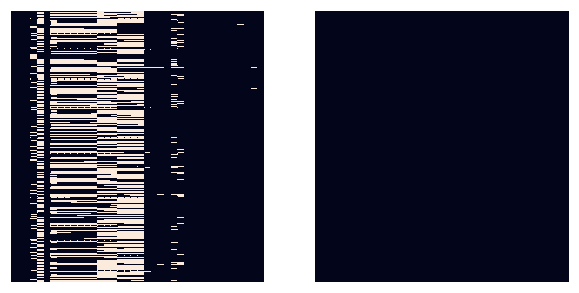

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.get_shared_y_axes().join(ax2)

g1 = sns.heatmap(df.isnull(), cbar=False, ax=ax1)
g1.set_xticks([])
g1.set_yticks([])

g2 = sns.heatmap(temp.isnull(), cbar=False, ax=ax2)
g2.set_xticks([])
g2.set_yticks([])

fig.show()

# Knowing the Features
* *frl_percent:* percentage of students who receive free lunch
* *ell_percent:* percentage of students who come from non-English speaking homes and who are learning English
* *sped_percent:* percentage of students with identified disabilities and need special education
* *ctt_num:* number of collaborative team teaching (general education and special education)
* *selfcontained_num:* number of self contained classroom, where special education teacher is responsible for all academic subjects

In [0]:
temp.dtypes

DBN                   object
Name                  object
schoolyear             int64
frl_percent          float64
total_enrollment       int64
prek                  object
k                     object
grade1                object
grade2                object
grade3                object
grade4                object
grade5                object
grade6                object
grade7                object
grade8                object
grade9                object
grade10               object
grade11               object
grade12               object
ell_num              float64
ell_percent          float64
sped_num             float64
sped_percent         float64
ctt_num               object
selfcontained_num     object
asian_num              int64
asian_per            float64
black_num              int64
black_per            float64
hispanic_num           int64
hispanic_per         float64
white_num              int64
white_per            float64
male_num             float64
male_per      

# Exploratory Data Analysis
*Question:* How many male and female students are distributed across all the schools?

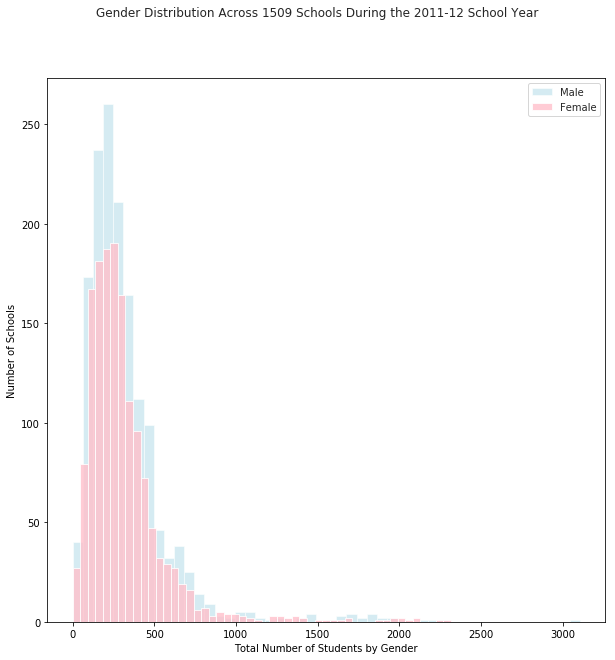

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_style("whitegrid")

sns.distplot(temp.male_num, ax=ax, color="lightblue",
             kde=False,
             hist_kws={"alpha":0.5}
            )
sns.distplot(temp.female_num, ax=ax, color="pink",
             kde=False,
             hist_kws={"alpha":0.8}
            )

fig.suptitle("Gender Distribution Across 1509 Schools During the 2011-12 School Year")
plt.xlabel("Total Number of Students by Gender")
plt.ylabel("Number of Schools")
plt.legend(["Male","Female"])
fig.show()

*Question:*  How many students of their respective ethnicities are distributed across all the schools?

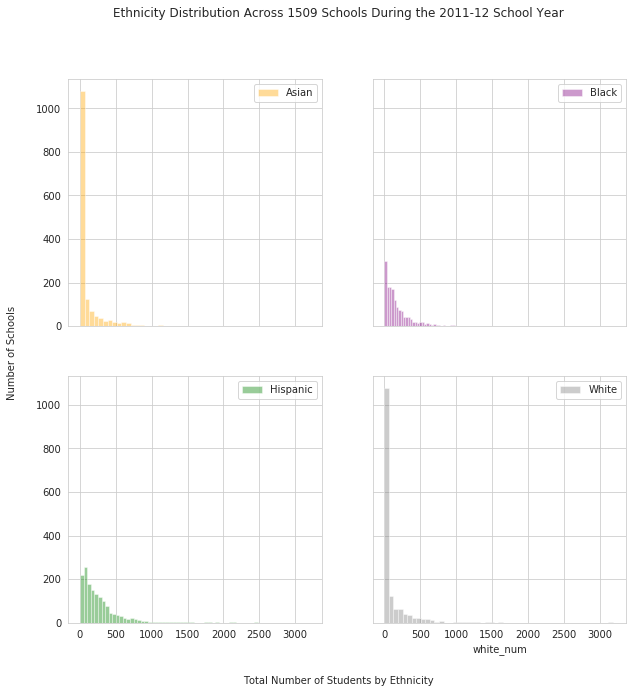

In [0]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True, sharey = True, figsize=(10,10))
sns.set_style("whitegrid")

sns.distplot(temp.asian_num, ax=ax1, color="orange",
             kde=False)
sns.distplot(temp.black_num, ax=ax2, color="purple",
             kde=False)
sns.distplot(temp.hispanic_num, ax=ax3, color="green",
             kde=False)
sns.distplot(temp.white_num, ax=ax4, color="gray",
             kde=False)

fig.suptitle("Ethnicity Distribution Across 1509 Schools During the 2011-12 School Year")
fig.text(0.5, 0.04, "Total Number of Students by Ethnicity", ha="center")
fig.text(0.04, 0.5, "Number of Schools", va="center", rotation="vertical")

ax1.legend(["Asian"])
ax1.set_xlabel("")
ax2.legend(["Black"])
ax2.set_xlabel("")
ax3.legend(["Hispanic"])
ax3.set_xlabel("")
ax4.legend(["White"])
fig.show()

*Question:* Which schools during the 2011-12 school year had the highest student enrollment? Lowest?

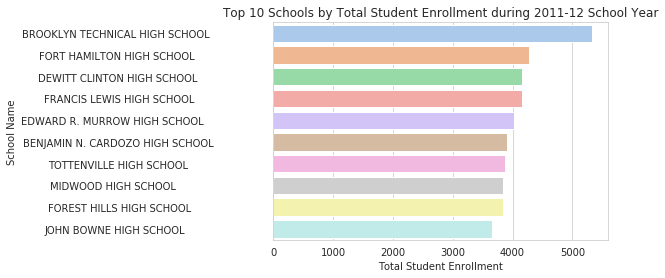

In [0]:
sns.barplot(x = temp.total_enrollment.sort_values(ascending=False).head(10),
            y = temp.sort_values("total_enrollment", ascending=False)["Name"].head(10),
            alpha = 1, palette="pastel"
           )

plt.title("Top 10 Schools by Total Student Enrollment during 2011-12 School Year")
plt.xlabel("Total Student Enrollment")
plt.ylabel("School Name")
plt.show()

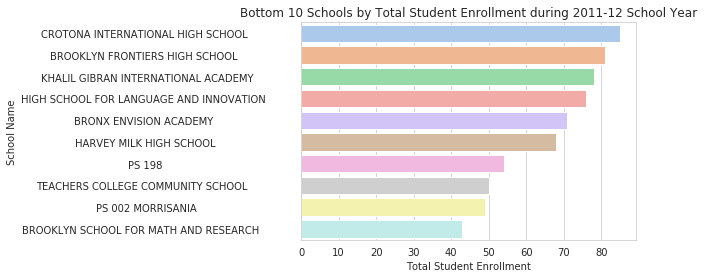

In [0]:
sns.barplot(x = temp.total_enrollment.sort_values(ascending=False).tail(10),
            y = temp.sort_values("total_enrollment", ascending=False)["Name"].tail(10),
            alpha = 1, palette="pastel"
           )

plt.title("Bottom 10 Schools by Total Student Enrollment during 2011-12 School Year")
plt.xlabel("Total Student Enrollment")
plt.ylabel("School Name")
plt.show()

In [0]:
bths = temp.total_enrollment.sort_values(ascending=False).head(1).index[0]
print(temp.sort_values("total_enrollment", ascending=False)["Name"].head(1))

4624    BROOKLYN TECHNICAL HIGH SCHOOL                  
Name: Name, dtype: object


In [0]:
temp.loc[[bths]].asian_per

4624    60.3
Name: asian_per, dtype: float64